In [138]:
%load_ext autoreload    
%autoreload 2
from plot import *
import sys 
sys.path.append('../')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [139]:
# results_path = "../../results/sgd-steps"
# results_path = "../../results/move-32-features"
# results_path = "../../results/mnk"
# results_path = "../../results/mnk-10"
# results_path = "../../results/nsga-mnk"
# results_path = "../../results/nsga-iii-mnk"
# results_path = "../../results/l2-reg"
# results_path = "../../results/min-pruned"
# results_path = "../../results/test"
#cresults_path = "../../results/sgd-steps"
# results_path = "../../results/gecco-24/fourier-features-old"
results_path = "../../results/gecco-24/sgd-steps"
# results_path = "../../results/topology-mutation-iters"
# results_path = "../../results/topology-mutation-iters"
# results_path = "../../results/fourier-features"
# results_path = "/home/jackson/projects/move/results/fns-per-cell"

# results_path = "../../results/fourier-features-control"
# results_path = "../../results/sgd-lr-mutate-rate"
# results_path = "../../results/hillclimber"
# results_path = "../../results/hillclimber_bloat_prune/"
show=True



os.makedirs(os.path.join(results_path, "plots"), exist_ok=True)

In [140]:
# pretty_names = {
#     "000_steps_" : "0 steps",
#     "016_steps_" : "16 steps",
#     "100_steps_" : "100 steps",
#     "1000_steps_" : "1000 steps",
    
# }
pretty_names = {}

In [141]:

save_path = os.path.join(results_path, "plots")
if os.path.exists(save_path):
    os.makedirs(os.path.join(save_path), exist_ok=True)

metrics = [
    "evals_by_batch",
    "normed_fitness_by_batch",
    # "pruned_cxs",
    # "pruned_nodes",
    # "offspring_by_batch",
    # "fitness_by_batch",
    # "lr_by_batch",
    # "cx_by_batch",
    # "nodes_by_batch",

]
results = read_tensor_results(results_path, metrics, max_runs=None)

Loading:   0%|          | 0/2 [00:00<?, ?it/s]

Merging:  67%|██████▋   | 215/323 [00:23<00:21,  4.93it/s]

In [ ]:
results

,batch,condition,cx_by_batch,evals_by_batch,nodes_by_batch,normed_fitness_by_batch,run,target
0,0,004_iters,159.0,505.0,14.0,0.267428,run_7322316770667794926,data/apple.png
1,1,004_iters,135.0,1010.0,14.0,0.302010,run_7322316770667794926,data/apple.png
2,2,004_iters,155.0,1515.0,14.0,0.337771,run_7322316770667794926,data/apple.png
3,3,004_iters,145.0,2020.0,18.0,0.357424,run_7322316770667794926,data/apple.png
4,4,004_iters,156.0,2525.0,18.0,0.361741,run_7322316770667794926,data/apple.png
...,...,...,...,...,...,...,...,...
7955,194,016_iters,85.0,98475.0,42.0,0.595712,run_11432688846186156526,data/apple.png
7956,195,016_iters,85.0,98980.0,42.0,0.595712,run_11432688846186156526,data/apple.png
7957,196,016_iters,85.0,99485.0,42.0,0.595712,run_11432688846186156526,data/apple.png
7958,197,016_iters,85.0,99990.0,42.0,0.595712,run_11432688846186156526,data/apple.png


In [ ]:
# # undo cumsum for conditions including (NSGA-III)
# results = results.groupby("run").apply(lambda x: x.apply(lambda y: y - y.shift(1) if y.name == "evals_by_batch" else y) if "NSGA-III" in x['condition'].values[0] else x)
# results = results.groupby("run").apply(lambda x: x.apply(lambda y: y.fillna(0) if y.name == "evals_by_batch" else y))



In [ ]:
def sort_conditions_numerically(list_of_conditions):
    return sorted(list_of_conditions, key=lambda x: int(x.split("_")[0]) if x.split("_")[0].isdigit() else 0)
results.condition = pd.Categorical(results.condition, categories=sort_conditions_numerically(results.condition.unique()), ordered=True)

In [ ]:
# rename conditions
results['condition_path'] = results.condition.copy()
# results.condition = results.condition.apply(lambda x: pretty_names[x])


In [ ]:
print(results.condition.unique())

['004_iters', '001_iters', '000_iters', '016_iters']
Categories (4, object): ['000_iters' < '001_iters' < '004_iters' < '016_iters']


In [ ]:
# max evals by condition
max_evals = results.groupby(["condition_path", "run"]).max().reset_index()
max_evals

,condition_path,run,batch,condition,cx_by_batch,evals_by_batch,nodes_by_batch,normed_fitness_by_batch,target
0,000_iters,run_10708121953476350446,198.0,000_iters,183.0,100495.0,16.0,0.669940,data/apple.png
1,000_iters,run_1126613209651679726,198.0,000_iters,152.0,100495.0,13.0,0.667666,data/apple.png
2,000_iters,run_11432688846186156526,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,000_iters,run_11796233647127335406,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,000_iters,run_12393516890508562926,198.0,000_iters,138.0,100495.0,12.0,0.685048,data/apple.png
...,...,...,...,...,...,...,...,...,...
155,016_iters,run_7923376638921675246,198.0,016_iters,140.0,100495.0,54.0,0.585120,data/apple.png
156,016_iters,run_8037926234204803566,198.0,016_iters,139.0,100495.0,48.0,0.532243,data/apple.png
157,016_iters,run_8079388740377711086,198.0,016_iters,189.0,100495.0,53.0,0.534444,data/apple.png
158,016_iters,run_8081397539531723246,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
results

,batch,condition,cx_by_batch,evals_by_batch,nodes_by_batch,normed_fitness_by_batch,run,target,condition_path
0,0,004_iters,159.0,505.0,14.0,0.267428,run_7322316770667794926,data/apple.png,004_iters
1,1,004_iters,135.0,1010.0,14.0,0.302010,run_7322316770667794926,data/apple.png,004_iters
2,2,004_iters,155.0,1515.0,14.0,0.337771,run_7322316770667794926,data/apple.png,004_iters
3,3,004_iters,145.0,2020.0,18.0,0.357424,run_7322316770667794926,data/apple.png,004_iters
4,4,004_iters,156.0,2525.0,18.0,0.361741,run_7322316770667794926,data/apple.png,004_iters
...,...,...,...,...,...,...,...,...,...
7955,194,016_iters,85.0,98475.0,42.0,0.595712,run_11432688846186156526,data/apple.png,016_iters
7956,195,016_iters,85.0,98980.0,42.0,0.595712,run_11432688846186156526,data/apple.png,016_iters
7957,196,016_iters,85.0,99485.0,42.0,0.595712,run_11432688846186156526,data/apple.png,016_iters
7958,197,016_iters,85.0,99990.0,42.0,0.595712,run_11432688846186156526,data/apple.png,016_iters


In [ ]:
for target in results.target.unique():
    print(target)
    for cond in results.condition.sort_values().unique():
        print("\t", cond, end='\t\t')
        # count runs with target
        print(results[(results.target==target ) & (results.condition==cond)].run.unique().shape[0])

data/apple.png
	 000_iters		10
	 001_iters		10
	 004_iters		10
	 016_iters		10


In [ ]:
# print the run with the most evals
results.groupby(["condition", "run"]).max().reset_index().sort_values("evals_by_batch", ascending=False).head(1)

,condition,run,batch,cx_by_batch,evals_by_batch,nodes_by_batch,normed_fitness_by_batch,target,condition_path
0,000_iters,run_10708121953476350446,198.0,183.0,100495.0,16.0,0.66994,data/apple.png,000_iters


In [ ]:
plot_results = results.copy()
if "NSGA-III" in plot_results.condition.unique():
    plot_results['condition'] = plot_results['condition'].apply(lambda x: fr"$\rho$: {float(x.split('_')[1]):.2f} M: {x.split('_')[2]} N: {x.split('_')[3]} K: {x.split('_')[4]} {''.join(x.split('_')[5:])}")
    # sort by condition
    # plot_results['condition'] = pd.Categorical(plot_results['condition'], categories=sorted(plot_results['condition'].unique(), key=lambda x: float(x.split(' ')[3]), reverse=True), ordered=True)
            

    sns.set_palette("tab10")
    sns.lineplot(plot_results, x="evals_by_batch", y="normed_fitness_by_batch", hue="condition", legend='full')
    plt.title("RMNK")
    plt.xlabel("Evaluations")
    plt.ylabel("Fitness")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

In [ ]:
experiment_name = results_path.split("/")[-1]
# pd.to_pickle(results, os.path.join("../../results/SUBMIT-GECCO-24", f"{experiment_name}.pkl"))
# experiment_name = "fourier-features"
# results = pd.read_pickle(os.path.join("../../results/SUBMIT-GECCO-24", f"{experiment_name}.pkl"))

In [ ]:
from stats import *
last_evals_by_run = results.groupby("run").max().evals_by_batch.to_dict()
# print(last_evals_by_run)
last_evals_filter = lambda x: x[x.evals_by_batch == last_evals_by_run[x.run.unique()[0]]]

filtered = results.groupby(["condition", "run"]).apply(last_evals_filter).reset_index(drop=True)


# Number of parameters
if 'nodes_by_batch' in filtered.columns and 'cx_by_batch' in filtered.columns:
    num_params = {}
    for run in filtered.run.unique():
        condition = filtered[filtered.run==run].condition.iloc[-1]
        target = filtered[filtered.run==run].target.iloc[-1]
        # print(condition)
        cx = filtered[filtered.run==run].cx_by_batch.iloc[-1]
        nodes = filtered[filtered.run==run].nodes_by_batch.iloc[-1]
        # print(cx, nodes, cx + nodes)
        num_params[(condition, target, run)] = cx + nodes
    num_params = pd.DataFrame.from_dict(num_params, orient='index').reset_index()
    # split into columns for run, condition, target
    num_params[['condition', 'target', 'run']] = pd.DataFrame(num_params['index'].tolist(), index=num_params.index)
    num_params = num_params.drop(columns='index')
    num_params = num_params.rename(columns={0: "num_params"})
    num_params['condition'] = num_params['condition'].apply(lambda x: x if x=="000_steps_"  else "more")
    means, stds, cis, p_values = get_stats_by_condition(num_params,"condition", "num_params")
    for k,m in means.items():
        print(k, m, "+/-", cis[k][1]-m)



more 151.05 +/- 16.594877915792466


In [ ]:
from stats import *
last_evals_by_run = results.groupby("run").max().evals_by_batch.to_dict()
# print(last_evals_by_run)
last_evals_filter = lambda x: x[x.evals_by_batch == last_evals_by_run[x.run.unique()[0]]]

filtered = results.groupby(["condition", "run"]).apply(last_evals_filter).reset_index(drop=True)


# Number of parameters
if 'nodes_by_batch' in filtered.columns and 'cx_by_batch' in filtered.columns:
    num_params = {}
    for run in filtered.run.unique():
        condition = filtered[filtered.run==run].condition.iloc[-1]
        target = filtered[filtered.run==run].target.iloc[-1]
        # print(condition)
        cx = filtered[filtered.run==run].cx_by_batch.iloc[-1]
        nodes = filtered[filtered.run==run].nodes_by_batch.iloc[-1]
        # print(cx, nodes, cx + nodes)
        num_params[(condition, target, run)] = cx + nodes
    num_params = pd.DataFrame.from_dict(num_params, orient='index').reset_index()
    # split into columns for run, condition, target
    num_params[['condition', 'target', 'run']] = pd.DataFrame(num_params['index'].tolist(), index=num_params.index)
    num_params = num_params.drop(columns='index')
    num_params = num_params.rename(columns={0: "num_params"})
    means, stds, cis, p_values, confidence = get_stats_by_condition(num_params,"condition", "num_params")
    
    print(means)



10 10
10 10
10 10
10 10
10 10
10 10
10 10
10 10
10 10
10 10
10 10
10 10
{'000_iters': 164.4, '001_iters': 192.5, '004_iters': 160.0, '016_iters': 87.3}


In [ ]:
means, stds, cis, p_values, confidence = get_stats_by_condition(filtered, "condition", "normed_fitness_by_batch")

10 10
10 10
10 10
10 10
10 10
10 10
10 10
10 10
10 10
10 10
10 10
10 10


In [ ]:
print("Means")
for k, v in means.items():
    print("\t", str(k)+":", v)

print("Stds")
for k, v in stds.items():
    print("\t", str(k)+":", v)

print("CIs")
for k, v in cis.items():
    print("\t", str(k)+":", v)

print("Confidence")
for k, v in confidence.items():
    print("\t", str(k)+":", v)

print("P Values")
for k, v in p_values.items():
    print(f"\t{k[0]} vs {k[1]}: {v} {'*'if v < 0.05 else ''}")


# save as tex table
strng = "mean & lower & upper \\\\ \n"
for k, v in means.items():
    strng += f"{k} & {cis[k][0]:.3f} & {cis[k][1]:.3f} \\\\ \n"
    
with open(os.path.join(save_path, "means.tex"), "w") as f:
    f.write(strng)
print(strng)

stng = "A & B & p \\\\ \n"
for k, v in p_values.items():
    strng += f"{k[0]} & {k[1]} & {v:.3f} \\\\ \n"

with open(os.path.join(save_path, "p_values.tex"), "w") as f:
    f.write(strng)

print(strng)


Means
	 000_iters: 0.6430725
	 001_iters: 0.6469879
	 004_iters: 0.658811
	 016_iters: 0.532651
Stds
	 000_iters: 0.05623580142855644
	 001_iters: 0.04332880303263664
	 004_iters: 0.025584302842617035
	 016_iters: 0.03423558548092842
CIs
	 000_iters: (0.6028438196749839, 0.6833011521725503)
	 001_iters: (0.6159923565630071, 0.6779834735151179)
	 004_iters: (0.6405090641125153, 0.6771128822223236)
	 016_iters: (0.5081603473372459, 0.5571416670136452)
Confidence
	 000_iters: 0.04022866624878324
	 001_iters: 0.03099555847605538
	 004_iters: 0.01830190905490419
	 016_iters: 0.024490659838199615
P Values
	000_iters vs 001_iters: 1.0 
	000_iters vs 004_iters: 0.556640625 
	000_iters vs 016_iters: 0.001953125 *
	001_iters vs 000_iters: 1.0 
	001_iters vs 004_iters: 1.0 
	001_iters vs 016_iters: 0.001953125 *
	004_iters vs 000_iters: 0.556640625 
	004_iters vs 001_iters: 1.0 
	004_iters vs 016_iters: 0.001953125 *
	016_iters vs 000_iters: 0.001953125 *
	016_iters vs 001_iters: 0.001953125 *
	0

In [ ]:
pretty_conditions = {
    "128_features": "128",
    "064_features": "64",
    "032_features": "32",
    "016_features": "16",
    "008_features": "8",
    "004_features": "4",
    "000_features": "0",
    "100_steps": "100",
    "000_steps": "0",
    "016_steps": "16",
    "1000_steps": "1000",
    "100_steps_": "100",
    "000_steps_": "0",
    "016_steps_": "16",
    "1000_steps_": "1000",
    "original-move-0-steps-0-features": "MOVE (No SGD or Fourier Features)",
}



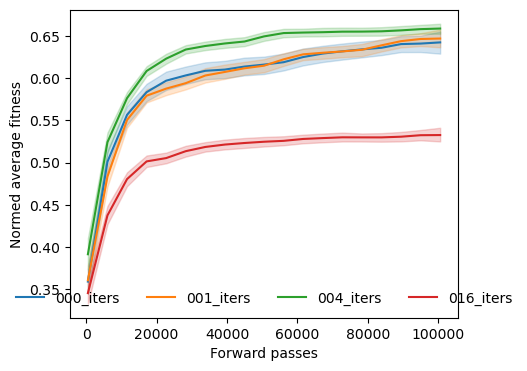

In [ ]:
# raise Exception("stop here")
try:
    plot_results = results.copy()
    plot_results['condition'] = plot_results['condition'].apply(lambda x: pretty_conditions[x] if x in pretty_conditions else x)
    gecco_save_path = "../../results/SUBMIT-GECCO-24/plots"
    os.makedirs(gecco_save_path, exist_ok=True)
    # plot_vs_evals(results, 'normed_fitness_by_batch', save_path, show)
    # plot_vs_evals(results, 'normed_fitness_by_batch', save_path, show, mean_by_target=True, smooth=0.95, title="Normed average fitness by number of SGD steps", y_label="Normed average fitness")
    leg_title = ""
    if "fourier" in results_path:
        leg_title = "Number of features"
    elif "steps" in results_path:
        leg_title = "Number of SGD steps in inner loop"

    plot_vs_evals(plot_results, 'normed_fitness_by_batch', gecco_save_path, show, mean_by_target=True, smooth=0.90, title=None, y_label="Normed average fitness", leg_title=leg_title, experiment_name=experiment_name)
except Exception as e:
    print(e)
    traceback.print_exc()
    pass

In [ ]:
if 'fitness_by_batch' in results.columns:
    # plot_vs_evals(results, 'normed_fitness_by_batch', save_path, show)
    # plot_vs_evals(results, 'normed_fitness_by_batch', save_path, show, mean_by_target=True, smooth=0.95, title="Normed average fitness by number of SGD steps", y_label="Normed average fitness")
    plot_vs_evals(results, 'fitness_by_batch', save_path, show, mean_by_target=True, smooth=0.95, title="Normed average fitness", y_label="Normed average fitness")

In [ ]:
if 'lr_by_batch' in results.columns:
    plot_vs_evals(results, 'lr_by_batch', save_path, show, mean_by_target=True, smooth=0.95, title="LR", y_label="LR")


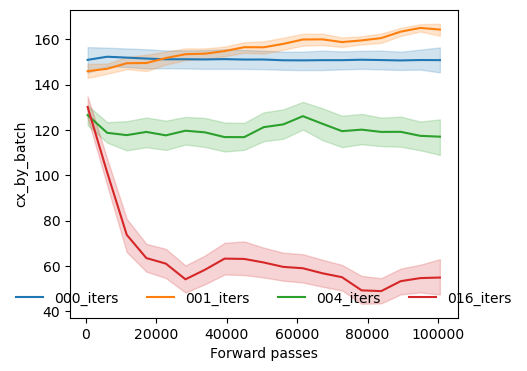

In [ ]:
if 'cx_by_batch' in results.columns:
    # plot_vs_evals(results, 'cx_by_batch', save_path, show)
    plot_vs_evals(results, 'cx_by_batch', save_path, show, mean_by_target=True, smooth=0.9)

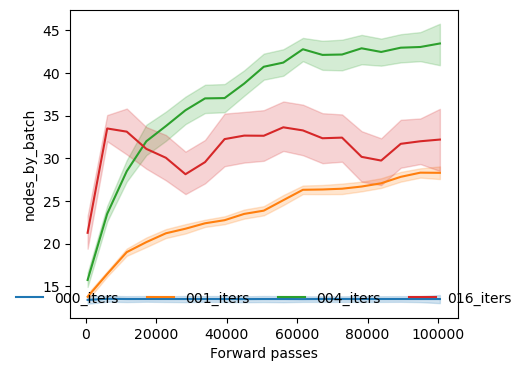

In [ ]:
if 'nodes_by_batch' in results.columns:
    # plot_vs_evals(results, 'nodes_by_batch', save_path, show)
    plot_vs_evals(results, 'nodes_by_batch', save_path, show, mean_by_target=True, smooth=0.9)

In [ ]:
if 'pruned_cxs' in results.columns:
    # plot_vs_evals(results, 'pruned_cxs', save_path, show)
    plot_vs_evals(results, 'pruned_cxs', save_path, show, mean_by_target=True, smooth=0.9)

In [ ]:
if 'pruned_nodes' in results.columns:
    # plot_vs_evals(results, 'pruned_nodes', save_path, show)
    plot_vs_evals(results, 'pruned_nodes', save_path, show, mean_by_target=True, smooth=0.9)

   batch  condition  cx_by_batch  evals_by_batch  nodes_by_batch  \
0    195  000_iters        172.0         98980.0            15.0   
1    187  001_iters        166.0         94940.0            28.0   
2    198  004_iters        134.0        100495.0            51.0   
3    198  016_iters         85.0        100495.0            42.0   

   normed_fitness_by_batch                       run          target  \
0                 0.702763   run_7267101280994988526  data/apple.png   
1                 0.693700  run_16639468842904850926  data/apple.png   
2                 0.691288   run_7218553178295243246  data/apple.png   
3                 0.595712  run_11432688846186156526  data/apple.png   

  condition_path  
0      000_iters  
1      001_iters  
2      004_iters  
3      016_iters  


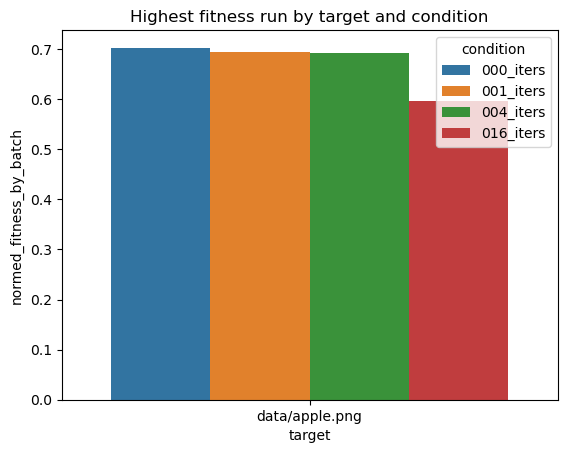

In [ ]:
highest_fit_runs_by_target_and_cond = results.groupby(['target', 'condition']).apply(lambda x: x.sort_values('normed_fitness_by_batch', ascending=False).iloc[0]).reset_index(drop=True)

print(highest_fit_runs_by_target_and_cond)


sns.barplot(data=highest_fit_runs_by_target_and_cond, x='target', y='normed_fitness_by_batch', hue='condition')
plt.title("Highest fitness run by target and condition")
plt.show()


In [ ]:
import sys
sys.path.append("../")
from move_config import resize_image



In [ ]:
import re
cond_dir = os.path.join(results_path, "conditions")

def load_images(images, results_path, prefix="best"):
     for target in results.target.unique():
        images[target] = {}
        for cond in results.condition.sort_values().unique():
            vals = highest_fit_runs_by_target_and_cond[(highest_fit_runs_by_target_and_cond.target==target) & (highest_fit_runs_by_target_and_cond.condition==cond)].run.values
            if len(vals) == 0:
                continue
            run = vals[0]
            condition_path = results[(results.target==target) & (results.condition==cond)]['condition_path'].values[0]
            # image_path = os.path.join(results_path, f"{cond_dir}/{condition_path}/{run}/images")
            # print(results_path, cond_dir, condition_pat?h, run)
            image_path = os.path.join(f"{cond_dir}/{condition_path}/{run}/images")
            best_regex = re.compile(f"{prefix}_[0-9]*.png")
            best_files = [f for f in os.listdir(image_path) if best_regex.match(f)]
            images[target][cond] = [os.path.join(image_path, f) for f in best_files]

In [ ]:
from IPython.display import display
from PIL import Image

target_order = ["data/apple.png", "data/sunrise.png", "data/skull.png", "data/dolphin.png"]

def plot_images(prefix='best'):
    images = {}
    load_images(images, results_path, prefix)
            
    # plot as a grid where each column is a condition and each row is a target
    fig, axes = plt.subplots(nrows=(results.target.unique()).shape[0], ncols=(results.condition.unique()).shape[0]+1, figsize=(6, 4))
    
    tars = results.target.unique()

    # sort targets by target_order
    tars = sorted(tars, key=lambda x: target_order.index(x))
    
    # add the initial target image to the first column
    tar_images = [os.path.join("../", f"{t}") for t in tars]
    
    for i, img in enumerate(tar_images):
        if len(axes.shape) == 1:
            ax = axes[i]
        else:
            ax = axes[i][0]
        if i == 0:
            ax.set_title(f"Target")
        ax.axis('off')
        img = Image.open(img)
        # numpy
        img = np.array(img)/255
        img = resize_image(img, (100,100), 'cpu')
        
        ax.imshow(img)
    
    for i, tar in enumerate(tars):
        for j, cond in enumerate(results.condition.sort_values().unique()):
            if len(axes.shape) == 1:
                ax = axes[j]
            else:
                ax = axes[i][j+1]
            if i == 0:
                ax.set_title(f"{pretty_conditions[cond] if cond in pretty_conditions else cond}")
            ax.axis('off')
            if tar not in images or cond not in images[tar] or len(images[tar][cond]) == 0:
                continue
            ax.imshow(Image.open(images[tar][cond][0]))
    
    
    plt.tight_layout()
    plt.savefig(os.path.join(save_path, f"{prefix}_images.pdf"), bbox_inches='tight')
    plt.savefig(os.path.join(gecco_save_path, f"{experiment_name}_{prefix}_images.pdf"), bbox_inches='tight')
    
    plt.show()

    

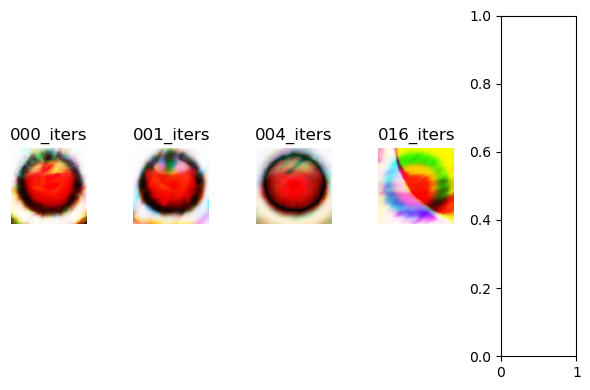

In [ ]:

try:
    plot_images('best')
except TypeError as e:
    # no images
    print(e)
    pass

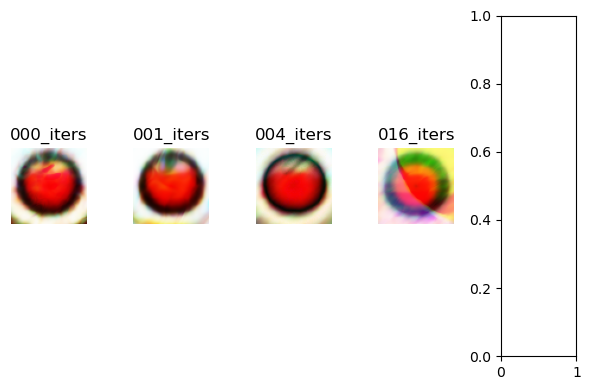

In [ ]:
try:
    plot_images('avg')
except TypeError as e:
    # no images
    pass

In [ ]:
# plot best image from every run for a given condition and target
def plot_cond_tar_images(condition, target, prefix='best'):
    filtered_results = results[(results.target==target) & (results.condition==condition)]
    print(filtered_results.run.unique())
    # take only the final image from each run
    filtered_results = filtered_results.groupby('run').apply(lambda x: x.sort_values('evals_by_batch').iloc[-1]).reset_index(drop=True)
    print(filtered_results)
    if filtered_results.shape[1] == 0:
        print("No results for that condition and target")
        return
    cols = 4
    rows = int(np.ceil(filtered_results.shape[1]/cols))
    print(rows, cols)
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(10, 10))
    for i, (_, row) in enumerate(filtered_results.iterrows()):
        ax = axes[int(np.floor(i/cols))][i%cols]
        ax.set_title(f"Run {row.run} fit: {row.normed_fitness_by_batch:.2f}")
        ax.axis('off')
        regex = re.compile(f"{prefix}_[0-9]*.png")
        # images = os.path.join(f"{cond_dir}/{row.condition_path}/{row.run}/images")
        images = os.path.join(f"{cond_dir}/{row.condition_path}/{row.run}/images")
        print(images)
        try:
            best_files = [f for f in os.listdir(images) if regex.match(f)]
            img = Image.open(os.path.join(images, best_files[0]))
            ax.imshow(img)
        except:
            continue
    plt.tight_layout()
    plt.show()

[]
Empty DataFrame
Columns: [batch, condition, cx_by_batch, evals_by_batch, nodes_by_batch, normed_fitness_by_batch, run, target, condition_path]
Index: []
3 4


/tmp/ipykernel_49547/3269096337.py:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  filtered_results = filtered_results.groupby('run').apply(lambda x: x.sort_values('evals_by_batch').iloc[-1]).reset_index(drop=True)


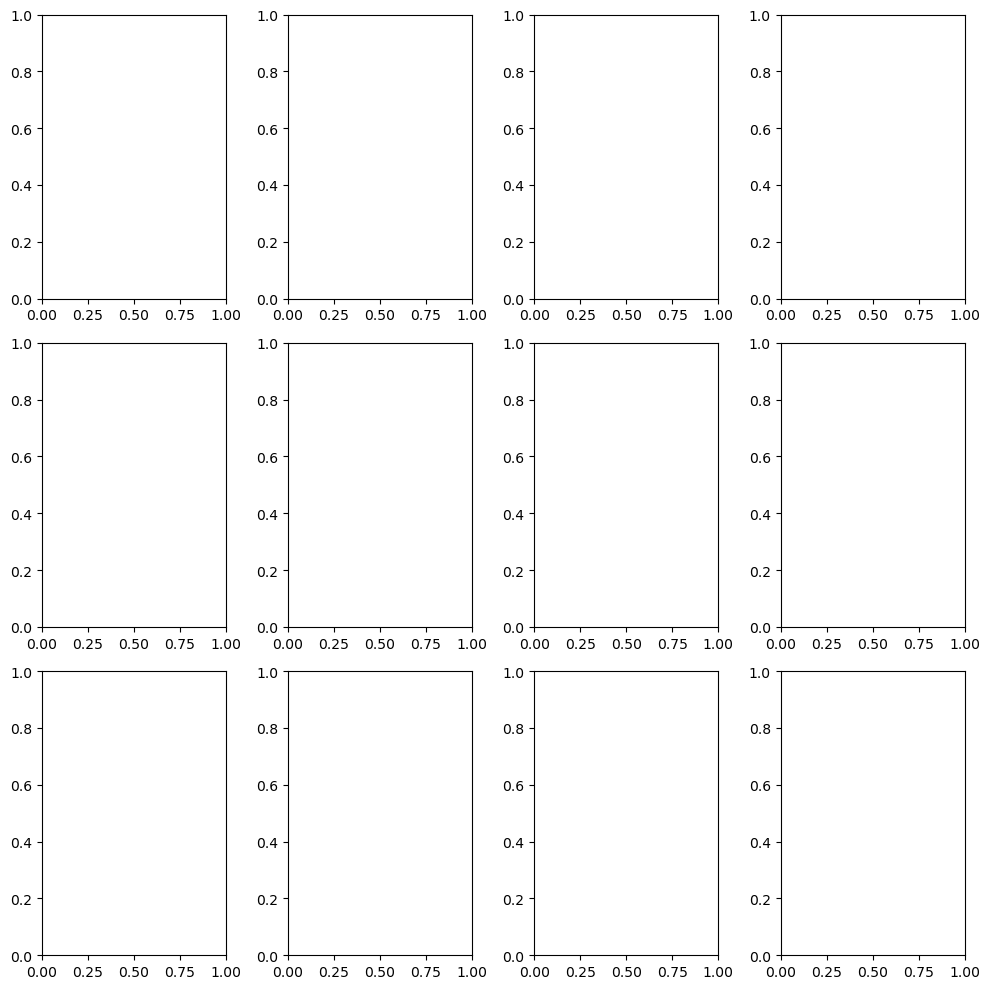

In [ ]:
# plot_cond_tar_images('1000 steps', 'data/sunrise.png')
# plot_cond_tar_images('000_features', 'data/sunrise.png')

cond_dir = os.path.join('../../results/old-fourier-features', "conditions")

plot_cond_tar_images('000_features', 'data/skull.png')

In [ ]:
import re
from IPython.display import display
from PIL import Image
from norm import read_norm_data
from sgd_weights import sgd_weights
from analysis_util import *
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
cond_dir = os.path.join(results_path, "conditions")

 


In [ ]:
cppns, inputs, configs, targets = get_cppns('best')

TypeError: get_cppns() missing 1 required positional argument: 'cond_dir'

In [ ]:
from bloat_then_prune import *
import traceback

def bloat_prune_best(target, condition):
    try:
        config = configs[target][condition]
        config.device = device
        target_image = targets[target][condition]
        norm = read_norm_data(os.path.join("../", config.norm_df_path), config.target_name)
        cppn = cppns[target][condition].clone(config, new_id=False)
        input = inputs[target][condition]
        ratio, cppn_after = test_bloat_prune(cppn, target_image, config, input, norm, True, 0, True, 1e-2)
        image_after = cppn_after(input)
        return cppn_after, image_after
    except Exception as e:
        print(e)
        print("No results for that condition and target")
        traceback.print_exc()
        return None, None
    


In [ ]:
images = {}
sgd_cppns = {}

data/dolphin.png 0.30000_lr_sigma


Pruned 2 connections
Pruned 0 nodes
Min weight: 0.021913321688771248


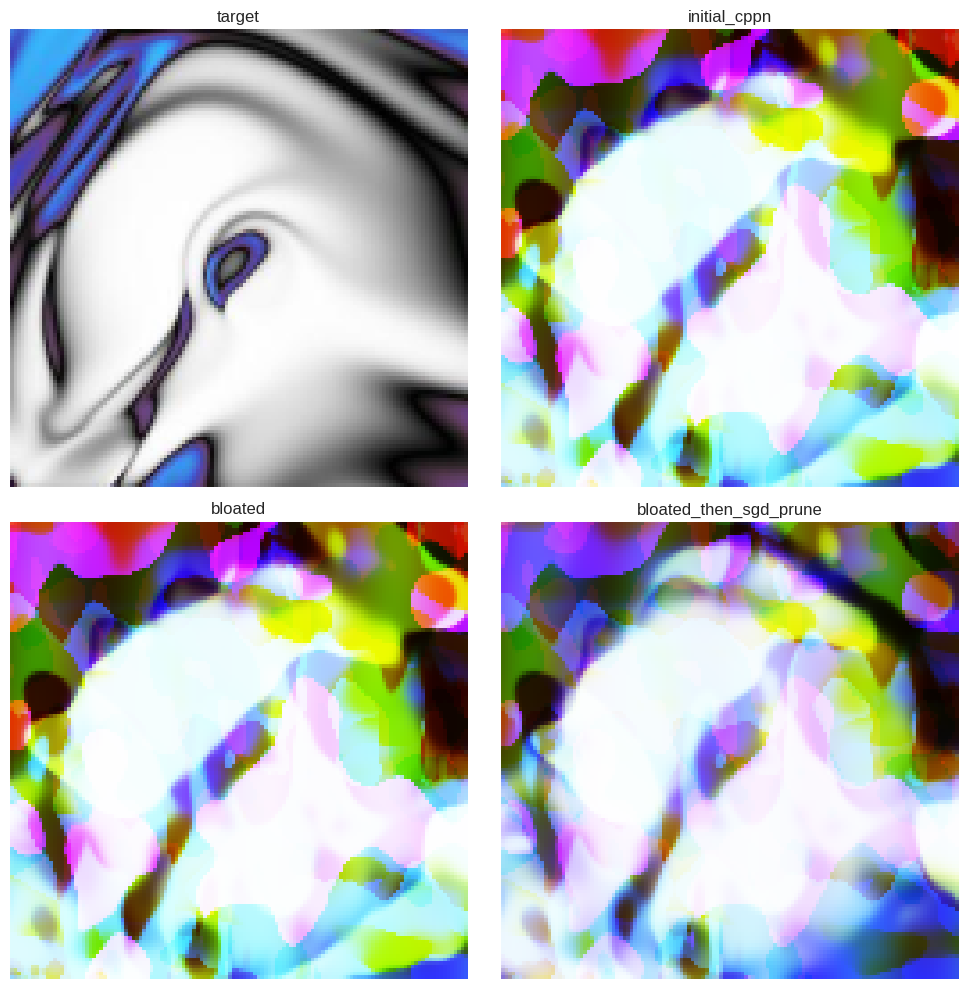


initial: 		103 nodes, 425 connections
bloated: 		103 nodes, 425 connections
bloated_pruned: 	103 nodes, 423 connections

Shared cxs initial : bloated				425
Shared cxs bloated : bloated_pruned			423
Shared cxs initial : bloated_pruned			423
Pruned from added / total pruned			0 / 2
--------------------------------------------------------------------------------
data/dolphin.png 0.00030_lr_sigma


Pruned 2 connections
Pruned 0 nodes
Min weight: 0.013602932915091515


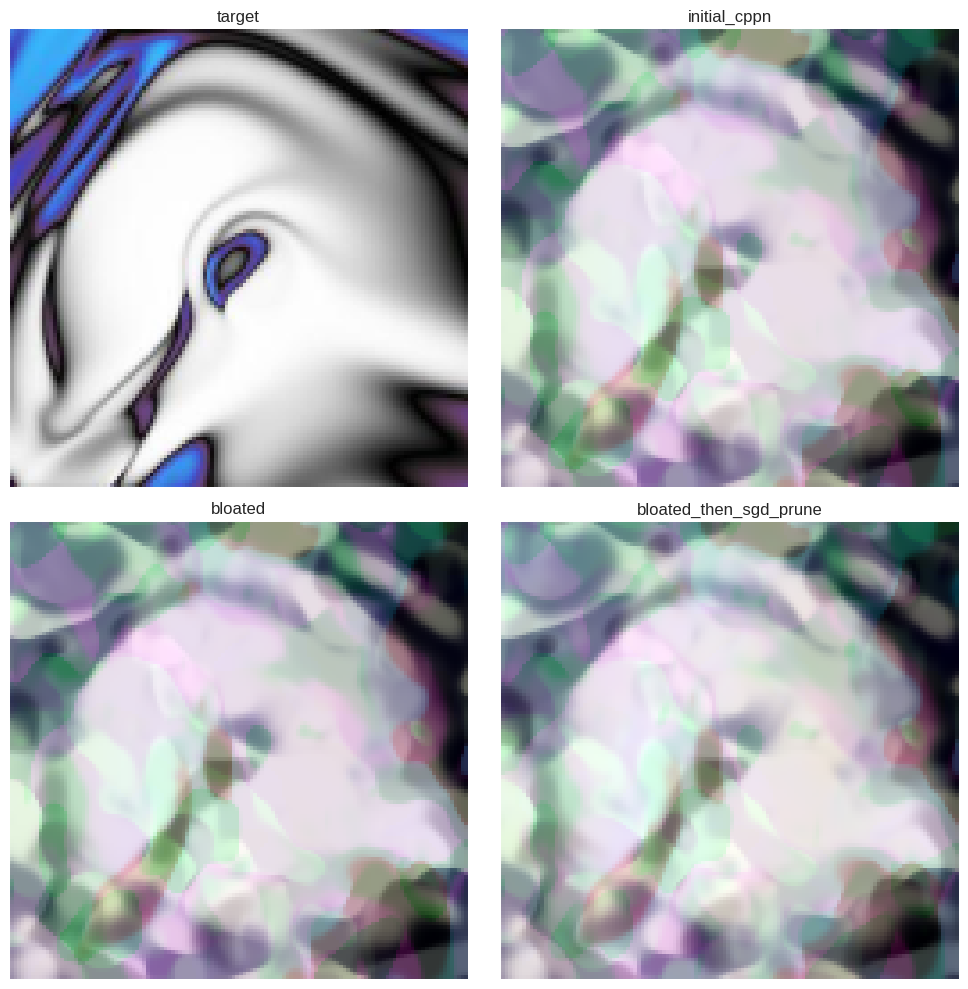


initial: 		114 nodes, 500 connections
bloated: 		114 nodes, 500 connections
bloated_pruned: 	114 nodes, 498 connections

Shared cxs initial : bloated				500
Shared cxs bloated : bloated_pruned			498
Shared cxs initial : bloated_pruned			498
Pruned from added / total pruned			0 / 2
--------------------------------------------------------------------------------
data/dolphin.png 0.03000_lr_sigma


In [ ]:

for t in results.target.unique():
    for c in results.condition.sort_values().unique():
        print(t, c)
        sgd_cppns[(t,c)], images[(t,c)] = bloat_prune_best(t,c)



In [ ]:
print(sgd_cppns)

In [ ]:
images = {}
for (t,c), cppn in sgd_cppns.items():
    if cppn is None:
        continue
    images[(t,c)] = cppn(inputs[t][c], channel_first=False).detach().cpu().numpy()
    if 'skull' in t:
        images[(t,c)] = 1.0-np.clip(images[(t,c)], 0, 1) # L got inverted for some reason TODO: why?

In [ ]:
# plot as grid
fig, axes = plt.subplots(nrows=(results.target.unique()).shape[0], ncols=(results.condition.unique()).shape[0]+1, figsize=(10, 10))

tars = results.target.unique()

# add the initial target image to the first column
print(os.getcwd())
tar_images = [os.path.join("../", f"{t}") for t in tars]

for i, img in enumerate(tar_images):
    ax = axes[i][0]
    ax.set_title(f"Target")
    ax.axis('off')
    img =Image.open(img)
    # numpy
    img = np.array(img)/255
    img = resize_image(img, (100,100), 'cpu')
    
    ax.imshow(img)

for i, tar in enumerate(tars):
    for j, cond in enumerate(results.condition.sort_values().unique()):
        ax = axes[i][j+1]
        ax.set_title(f"{cond}")
        ax.axis('off')
        if (tar, cond) not in images:
            continue
        ax.imshow(images[(tar, cond)])

plt.tight_layout()

plt.show()


In [ ]:
final_cppns = {}
pruned = {}
for t,c in images.keys():
    if (t,c) not in images:
        continue
    norm = read_norm_data(os.path.join("../", configs[t][c].norm_df_path), configs[t][c].target_name)
    pruned[(t,c)] = show_prune_effect(sgd_cppns[(t,c)],  configs[t][c], inputs[t][c], targets[t][c], norm, 0)
    final_cppns[(t,c)] = pruned[(t,c)][-1]
    

In [ ]:
# plot as grid
fig, axes = plt.subplots(nrows=(results.target.unique()).shape[0], ncols=(results.condition.unique()).shape[0]+1, figsize=(10, 10))

tars = results.target.unique()

# add the initial target image to the first column
print(os.getcwd())
tar_images = [os.path.join("../", f"{t}") for t in tars]

for i, img in enumerate(tar_images):
    ax = axes[i][0]
    ax.set_title(f"Target")
    ax.axis('off')
    img =Image.open(img)
    # numpy
    img = np.array(img)/255
    img = resize_image(img, (100,100), 'cpu')
    
    ax.imshow(img)

for i, tar in enumerate(tars):
    for j, cond in enumerate(results.condition.sort_values().unique()):
        ax = axes[i][j+1]
        ax.set_title(f"{cond}")
        ax.axis('off')
        if (tar, cond) not in images:
            continue
        final_image = final_cppns[(tar, cond)](inputs[tar][cond], channel_first=False).detach().cpu().numpy()
        ax.imshow(final_image)

plt.tight_layout()

plt.show()


## LEARNING RATE BY OBJECTIVE FUNCTION

In [ ]:
metrics = ['lr_by_batch']
lr_results = read_tensor_results(results_path, metrics, 
                              max_runs=None, reduce=False, only_final=False)

fns = [
    "psnr",
    "mse",
    "lpips",
    "dists",
    "ssim",
    "haarpsi",
    "vif",
    "msssim",
    "dss",
    "gmsd"
],




lr_results

Loading:   0%|          | 0/1 [00:00<?, ?it/s]

Merging: 100%|██████████| 64/64 [00:00<00:00, 203.34it/s]


,cell,lr_by_batch,condition,run,target
0,psnr_ssim_haarpsi,0.499445,0.30000_lr_sigma,run_11970315809654116846,data/dolphin.png
1,vif_msssim_dss,0.206979,0.30000_lr_sigma,run_11970315809654116846,data/dolphin.png
2,dists_vif_gmsd,0.977339,0.30000_lr_sigma,run_11970315809654116846,data/dolphin.png
3,mse_vif_msssim,1.235140,0.30000_lr_sigma,run_11970315809654116846,data/dolphin.png
4,lpips_ssim_gmsd,1.223633,0.30000_lr_sigma,run_11970315809654116846,data/dolphin.png
...,...,...,...,...,...
3245,psnr_mse_ssim,0.030000,0.00000_lr_sigma,run_12015061981534687726,data/dolphin.png
3246,psnr_mse_lpips,0.030000,0.00000_lr_sigma,run_12015061981534687726,data/dolphin.png
3247,haarpsi_msssim_dss,0.030000,0.00000_lr_sigma,run_12015061981534687726,data/dolphin.png
3248,lpips_dss_gmsd,0.030000,0.00000_lr_sigma,run_12015061981534687726,data/dolphin.png


In [ ]:
# barplot by function (functions are in the cell column, ie each cell is function1_function2_function3)
# make a new column for each function, and split the cell column into multiple columns
lr_results = lr_results.join(lr_results.cell.str.split("_", expand=True).add_prefix("function_"))
lr_results

,cell,lr_by_batch,condition,run,target,function_0,function_1,function_2
0,psnr_ssim_haarpsi,0.499445,0.30000_lr_sigma,run_11970315809654116846,data/dolphin.png,psnr,ssim,haarpsi
1,vif_msssim_dss,0.206979,0.30000_lr_sigma,run_11970315809654116846,data/dolphin.png,vif,msssim,dss
2,dists_vif_gmsd,0.977339,0.30000_lr_sigma,run_11970315809654116846,data/dolphin.png,dists,vif,gmsd
3,mse_vif_msssim,1.235140,0.30000_lr_sigma,run_11970315809654116846,data/dolphin.png,mse,vif,msssim
4,lpips_ssim_gmsd,1.223633,0.30000_lr_sigma,run_11970315809654116846,data/dolphin.png,lpips,ssim,gmsd
...,...,...,...,...,...,...,...,...
3245,psnr_mse_ssim,0.030000,0.00000_lr_sigma,run_12015061981534687726,data/dolphin.png,psnr,mse,ssim
3246,psnr_mse_lpips,0.030000,0.00000_lr_sigma,run_12015061981534687726,data/dolphin.png,psnr,mse,lpips
3247,haarpsi_msssim_dss,0.030000,0.00000_lr_sigma,run_12015061981534687726,data/dolphin.png,haarpsi,msssim,dss
3248,lpips_dss_gmsd,0.030000,0.00000_lr_sigma,run_12015061981534687726,data/dolphin.png,lpips,dss,gmsd


In [ ]:
# Melting the DataFrame
melted_df = lr_results.melt(id_vars=['cell', 'lr_by_batch', 'condition', 'run', 'target'], 
                    value_vars=['function_0', 'function_1', 'function_2'], 
                    var_name='function', 
                    value_name='value')
# Optional: Rename 'function' values for clarity
melted_df['function'] = melted_df['value']
melted_df.drop('value', axis=1, inplace=True)
melted_df

,cell,lr_by_batch,condition,run,target,function
0,psnr_ssim_haarpsi,0.499445,0.30000_lr_sigma,run_11970315809654116846,data/dolphin.png,psnr
1,vif_msssim_dss,0.206979,0.30000_lr_sigma,run_11970315809654116846,data/dolphin.png,vif
2,dists_vif_gmsd,0.977339,0.30000_lr_sigma,run_11970315809654116846,data/dolphin.png,dists
3,mse_vif_msssim,1.235140,0.30000_lr_sigma,run_11970315809654116846,data/dolphin.png,mse
4,lpips_ssim_gmsd,1.223633,0.30000_lr_sigma,run_11970315809654116846,data/dolphin.png,lpips
...,...,...,...,...,...,...
9745,psnr_mse_ssim,0.030000,0.00000_lr_sigma,run_12015061981534687726,data/dolphin.png,ssim
9746,psnr_mse_lpips,0.030000,0.00000_lr_sigma,run_12015061981534687726,data/dolphin.png,lpips
9747,haarpsi_msssim_dss,0.030000,0.00000_lr_sigma,run_12015061981534687726,data/dolphin.png,dss
9748,lpips_dss_gmsd,0.030000,0.00000_lr_sigma,run_12015061981534687726,data/dolphin.png,gmsd


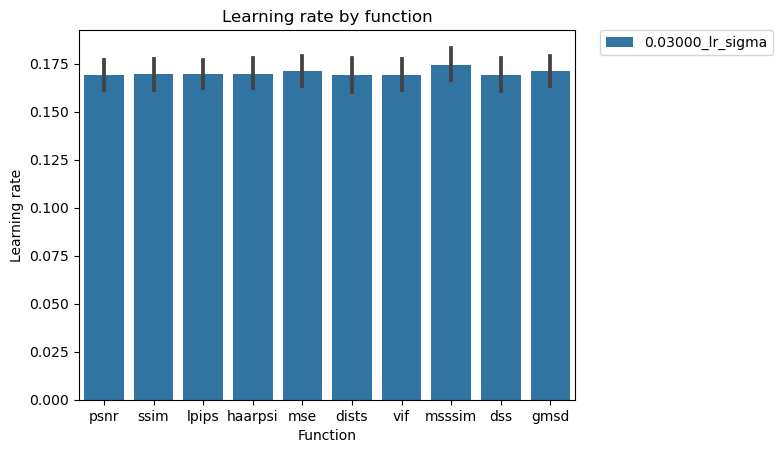

In [ ]:

plot_df = melted_df.copy()
plot_df = plot_df[plot_df['condition'] == '0.03000_lr_sigma']
# plot_df = plot_df[plot_df['target'] == 'data/sunrise.png']

sns.barplot(data=plot_df, x='function', y='lr_by_batch', hue='condition')
plt.title("Learning rate by function")
plt.xlabel("Function")
plt.ylabel("Learning rate")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig(os.path.join(save_path, "lr_by_function.pdf"), bbox_inches='tight')
plt.show()

In [ ]:
raise("Stop")

TypeError: exceptions must derive from BaseException

## Hillclimber

In [ ]:
hc_results_path = "../../results/hillclimber"


In [ ]:
metrics = ['normed_fitness_by_batch', 'evals_by_batch']

In [ ]:
move_results = read_tensor_results(results_path, metrics,
                              fns = [
                                    "psnr",
                                    "mse",
                                    "lpips",
                                    "dists",
                                    "ssim",
                                    "haarpsi",
                                    "vif",
                                    "msssim",
                                    "dss",
                                    "gmsd"
                                ],
                              max_runs=None)




hc_results = read_tensor_results(hc_results_path, metrics, max_runs=None)

Merging: 100%|██████████| 439/439 [00:08<00:00, 52.95it/s] 


In [ ]:
hc_results['function'] = hc_results['condition']
hc_results['condition'] = 'hillclimber'
hc_results['function'] = hc_results['function'].apply(lambda x: x+'_normed')
hc_results

,batch,condition,evals_by_batch,normed_fitness_by_batch,run,target,function
0,0,hillclimber,505.0,0.370926,run_7758879039265247726,data/dolphin.png,lpips_normed
1,1,hillclimber,1010.0,0.399130,run_7758879039265247726,data/dolphin.png,lpips_normed
2,2,hillclimber,1515.0,0.399130,run_7758879039265247726,data/dolphin.png,lpips_normed
3,3,hillclimber,2020.0,0.432656,run_7758879039265247726,data/dolphin.png,lpips_normed
4,4,hillclimber,2525.0,0.442396,run_7758879039265247726,data/dolphin.png,lpips_normed
...,...,...,...,...,...,...,...
51185,355,hillclimber,99290.0,0.773811,run_2885543544447046126,data/skull.png,dists_normed
51186,356,hillclimber,99385.0,0.773811,run_2885543544447046126,data/skull.png,dists_normed
51187,357,hillclimber,99690.0,0.773811,run_2885543544447046126,data/skull.png,dists_normed
51188,358,hillclimber,99970.0,0.773811,run_2885543544447046126,data/skull.png,dists_normed


In [ ]:
move_results

,batch,condition,dists_normed,dss_normed,evals_by_batch,gmsd_normed,haarpsi_normed,lpips_normed,mse_normed,msssim_normed,psnr_normed,run,ssim_normed,target,vif_normed
0,0,000_features,0.283485,0.200291,505.0,0.430146,0.275352,0.431085,0.827567,0.728810,0.099388,run_2333396619197223406,0.403306,data/dolphin.png,0.122609
1,1,000_features,0.309240,0.364294,910.0,0.447779,0.275352,0.438212,0.854619,0.754957,0.109109,run_2333396619197223406,0.418448,data/dolphin.png,0.126336
2,2,000_features,0.317766,0.283019,1415.0,0.447779,0.230578,0.473071,0.865990,0.754957,0.113748,run_2333396619197223406,0.436624,data/dolphin.png,0.132383
3,3,000_features,0.348607,0.398763,1920.0,0.447779,0.393655,0.507926,0.865990,0.754957,0.113748,run_2333396619197223406,0.436624,data/dolphin.png,0.132383
4,4,000_features,0.348607,0.398763,2425.0,0.447779,0.393655,0.520757,0.865990,0.754957,0.113748,run_2333396619197223406,0.436624,data/dolphin.png,0.132383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27379,492,064_features,0.602933,0.815265,248110.0,0.710173,0.347810,0.609134,0.913137,0.865219,0.138445,run_2351564640090591726,0.587933,data/dolphin.png,0.338156
27380,493,064_features,0.602933,0.821527,248615.0,0.710173,0.347810,0.609134,0.913137,0.865219,0.138445,run_2351564640090591726,0.587933,data/dolphin.png,0.338156
27381,494,064_features,0.602933,0.821527,249120.0,0.710173,0.347810,0.609134,0.913137,0.865219,0.138445,run_2351564640090591726,0.587933,data/dolphin.png,0.338156
27382,495,064_features,0.602933,0.821527,249625.0,0.710173,0.347810,0.609134,0.913137,0.865219,0.138445,run_2351564640090591726,0.587933,data/dolphin.png,0.338156


In [ ]:
# move_condition_filter = "100_steps_"
# move_results = move_results[move_results.condition.str.contains(move_condition_filter)]

In [ ]:
move_results.loc[:,'all-objective_normed'] = move_results.loc[:,['psnr_normed', 'mse_normed', 'lpips_normed', 'dists_normed', 'ssim_normed', 'haarpsi_normed', 'vif_normed', 'msssim_normed', 'dss_normed', 'gmsd_normed']].mean(axis=1)

In [ ]:
move_results


,batch,condition,dists_normed,dss_normed,evals_by_batch,gmsd_normed,haarpsi_normed,lpips_normed,mse_normed,msssim_normed,psnr_normed,run,ssim_normed,target,vif_normed,all-objective_normed
0,0,000_features,0.283485,0.200291,505.0,0.430146,0.275352,0.431085,0.827567,0.728810,0.099388,run_2333396619197223406,0.403306,data/dolphin.png,0.122609,0.380204
1,1,000_features,0.309240,0.364294,910.0,0.447779,0.275352,0.438212,0.854619,0.754957,0.109109,run_2333396619197223406,0.418448,data/dolphin.png,0.126336,0.409835
2,2,000_features,0.317766,0.283019,1415.0,0.447779,0.230578,0.473071,0.865990,0.754957,0.113748,run_2333396619197223406,0.436624,data/dolphin.png,0.132383,0.405591
3,3,000_features,0.348607,0.398763,1920.0,0.447779,0.393655,0.507926,0.865990,0.754957,0.113748,run_2333396619197223406,0.436624,data/dolphin.png,0.132383,0.440043
4,4,000_features,0.348607,0.398763,2425.0,0.447779,0.393655,0.520757,0.865990,0.754957,0.113748,run_2333396619197223406,0.436624,data/dolphin.png,0.132383,0.441326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27379,492,064_features,0.602933,0.815265,248110.0,0.710173,0.347810,0.609134,0.913137,0.865219,0.138445,run_2351564640090591726,0.587933,data/dolphin.png,0.338156,0.592820
27380,493,064_features,0.602933,0.821527,248615.0,0.710173,0.347810,0.609134,0.913137,0.865219,0.138445,run_2351564640090591726,0.587933,data/dolphin.png,0.338156,0.593447
27381,494,064_features,0.602933,0.821527,249120.0,0.710173,0.347810,0.609134,0.913137,0.865219,0.138445,run_2351564640090591726,0.587933,data/dolphin.png,0.338156,0.593447
27382,495,064_features,0.602933,0.821527,249625.0,0.710173,0.347810,0.609134,0.913137,0.865219,0.138445,run_2351564640090591726,0.587933,data/dolphin.png,0.338156,0.593447


In [ ]:
import warnings 
warnings.filterwarnings('ignore',"A value is trying to be set on a copy of a slice from a DataFrame.")


fn_dfs = []
drop_cols = []
for col in move_results.columns:
    if not col.endswith("_normed"):
        continue
    df = move_results[[col, 'condition', 'target', 'run']]
    df.loc[:,'function'] = col
    df.loc[:,'normed_fitness_by_batch'] = df[col]
    fn_dfs.append(df)
    drop_cols.append(col)

fn_dfs = pd.concat(fn_dfs)
fn_dfs = fn_dfs.drop(columns=drop_cols)
move_results = fn_dfs
fn_dfs

/tmp/ipykernel_100258/4000155942.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'function'] = col
/tmp/ipykernel_100258/4000155942.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'normed_fitness_by_batch'] = df[col]
/tmp/ipykernel_100258/4000155942.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,condition,target,run,function,normed_fitness_by_batch
0,000_features,data/dolphin.png,run_2333396619197223406,dists_normed,0.283485
1,000_features,data/dolphin.png,run_2333396619197223406,dists_normed,0.309240
2,000_features,data/dolphin.png,run_2333396619197223406,dists_normed,0.317766
3,000_features,data/dolphin.png,run_2333396619197223406,dists_normed,0.348607
4,000_features,data/dolphin.png,run_2333396619197223406,dists_normed,0.348607
...,...,...,...,...,...
27379,064_features,data/dolphin.png,run_2351564640090591726,all-objective_normed,0.592820
27380,064_features,data/dolphin.png,run_2351564640090591726,all-objective_normed,0.593447
27381,064_features,data/dolphin.png,run_2351564640090591726,all-objective_normed,0.593447
27382,064_features,data/dolphin.png,run_2351564640090591726,all-objective_normed,0.593447


In [ ]:
hc_results.condition = pd.Categorical(hc_results.condition, categories=sort_conditions_numerically(hc_results.condition.unique()), ordered=True)
hc_results['condition_path'] = hc_results.condition.copy()


In [ ]:
all_results = pd.concat([move_results, hc_results], ignore_index=True)

In [ ]:
all_results

,condition,target,run,function,normed_fitness_by_batch,batch,evals_by_batch,condition_path
0,000_features,data/dolphin.png,run_2333396619197223406,dists_normed,0.283485,NaN,NaN,NaN
1,000_features,data/dolphin.png,run_2333396619197223406,dists_normed,0.309240,NaN,NaN,NaN
2,000_features,data/dolphin.png,run_2333396619197223406,dists_normed,0.317766,NaN,NaN,NaN
3,000_features,data/dolphin.png,run_2333396619197223406,dists_normed,0.348607,NaN,NaN,NaN
4,000_features,data/dolphin.png,run_2333396619197223406,dists_normed,0.348607,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
352409,hillclimber,data/skull.png,run_2885543544447046126,dists_normed,0.773811,355.0,99290.0,hillclimber
352410,hillclimber,data/skull.png,run_2885543544447046126,dists_normed,0.773811,356.0,99385.0,hillclimber
352411,hillclimber,data/skull.png,run_2885543544447046126,dists_normed,0.773811,357.0,99690.0,hillclimber
352412,hillclimber,data/skull.png,run_2885543544447046126,dists_normed,0.773811,358.0,99970.0,hillclimber


In [ ]:
# filter to just the max fitness for each run
max_fit_rows = all_results.groupby(['target', 'condition', 'run', 'function']).apply(lambda x: x.sort_values('normed_fitness_by_batch', ascending=False).iloc[0]).reset_index(drop=True)
max_fit_rows

,condition,target,run,function,normed_fitness_by_batch,batch,evals_by_batch,condition_path
0,000_features,data/apple.png,run_14085716378562466286,all-objective_normed,0.683950,NaN,NaN,NaN
1,000_features,data/apple.png,run_14085716378562466286,dists_normed,0.691291,NaN,NaN,NaN
2,000_features,data/apple.png,run_14085716378562466286,dss_normed,0.810051,NaN,NaN,NaN
3,000_features,data/apple.png,run_14085716378562466286,gmsd_normed,0.766073,NaN,NaN,NaN
4,000_features,data/apple.png,run_14085716378562466286,haarpsi_normed,0.612055,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
798,hillclimber,data/sunrise.png,run_8908997854376825326,ssim_normed,0.688700,215.0,100410.0,hillclimber
799,hillclimber,data/sunrise.png,run_9684693352038142446,psnr_normed,0.474206,277.0,100050.0,hillclimber
800,hillclimber,data/sunrise.png,run_9821858329546330606,ssim_normed,0.734168,203.0,100070.0,hillclimber
801,hillclimber,data/sunrise.png,run_9975760760247489006,all-objective_normed,0.638084,202.0,100320.0,hillclimber


In [ ]:
# max_fits_by_target_and_cond = all_results.groupby(['target', 'condition']).apply(lambda x: x.sort_values('normed_fitness_by_batch', ascending=False).iloc[0]).reset_index(drop=True)

In [ ]:
# only show 100 steps (since hillclimber only has 100 steps)
max_fits_by_target_and_cond = max_fit_rows[max_fit_rows.condition.str.contains("016_features") | max_fit_rows.condition.str.contains("hillclimber")]

max_fits_by_target_and_cond.loc[max_fits_by_target_and_cond['condition'] == "100_steps", 'condition'] = "MOVE-Back champion"
max_fits_by_target_and_cond.loc[max_fits_by_target_and_cond['condition'] == "hillclimber", 'condition'] = "Hillclimber"

In [ ]:
max_fits_by_target_and_cond['function'] = max_fits_by_target_and_cond['function'].apply(lambda x: x.split("_")[0])

/tmp/ipykernel_100258/2606327527.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_fits_by_target_and_cond['function'] = max_fits_by_target_and_cond['function'].apply(lambda x: x.split("_")[0])


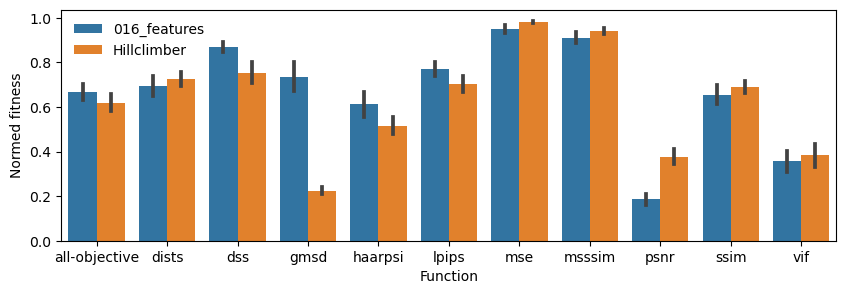

In [ ]:
ax, fig = plt.subplots(figsize=(10, 3))
sns.barplot(data=max_fits_by_target_and_cond, x='function', y='normed_fitness_by_batch', hue='condition')
plt.ylabel("Normed fitness")
plt.xlabel("Function")
plt.legend(loc= "upper left", frameon=False)
plt.show()